In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Data pre-processing

In [10]:
bmi_df = pd.read_csv('./data/bodyfat.csv')
bmi_df.head()

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,Y,M,23,69.97,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,Y,M,22,78.59,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,Y,M,22,69.85,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,Y,M,26,83.80,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,Y,M,24,83.58,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Dataset tersebut diambil dari [body-fat-extended dataset from Kaggle](https://www.kaggle.com/datasets/simonezappatini/body-fat-extended-dataset). Dengan satuan metrik untuk variabel tertentu yang akan dijadikan acuan adalah **BodyFat**, **Sex**, **Age**, **Weight** (kg), dan **Height** (meter). 

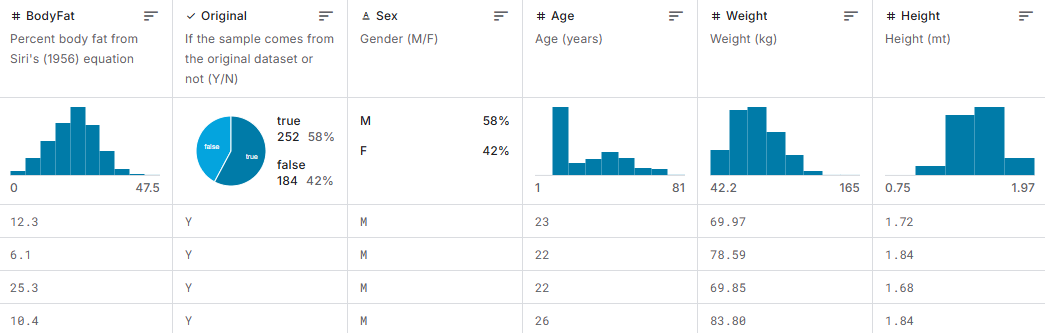

In [11]:
bmi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BodyFat   436 non-null    float64
 1   Original  436 non-null    object 
 2   Sex       436 non-null    object 
 3   Age       436 non-null    int64  
 4   Weight    436 non-null    float64
 5   Height    436 non-null    float64
 6   Neck      436 non-null    float64
 7   Chest     436 non-null    float64
 8   Abdomen   436 non-null    float64
 9   Hip       436 non-null    float64
 10  Thigh     436 non-null    float64
 11  Knee      436 non-null    float64
 12  Ankle     436 non-null    float64
 13  Biceps    436 non-null    float64
 14  Forearm   436 non-null    float64
 15  Wrist     436 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 54.6+ KB


In [13]:
# drop kolom yang tidak diperlukan 
bmi_df.drop(columns=['Original', 'Neck', 'Forearm', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'], inplace=True)
bmi_df.head()

,BodyFat,Sex,Age,Weight,Height
0,12.3,M,23,69.97,1.72
1,6.1,M,22,78.59,1.84
2,25.3,M,22,69.85,1.68
3,10.4,M,26,83.80,1.84
4,28.7,M,24,83.58,1.81


In [14]:
# cek apakah ada data yang hilang 
bmi_df.isnull().sum()

BodyFat    0
Sex        0
Age        0
Weight     0
Height     0
dtype: int64

In [15]:
# cek apakah ada data duplikat
bmi_df.duplicated().sum()

np.int64(0)

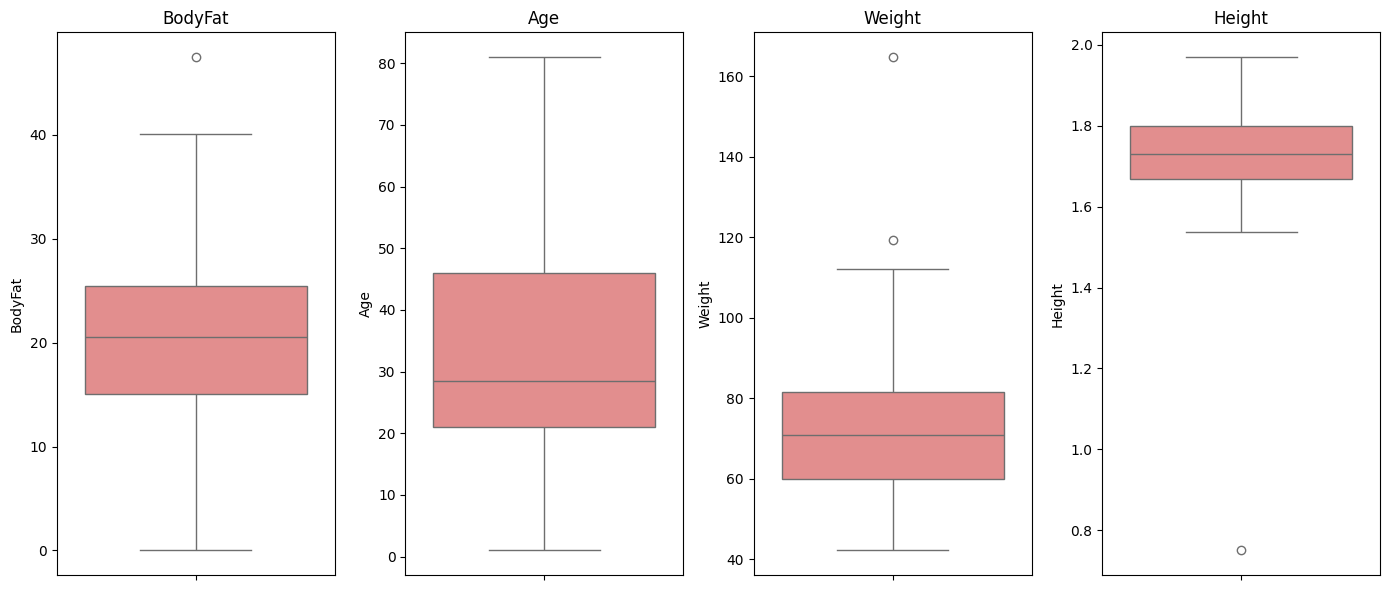

In [ ]:
# visualisasi persebaran data menggunakan boxplot untuk mengidentifikasi outlier
numeric_columns = ['BodyFat', 'Age', 'Weight', 'Height']
n = len(numeric_columns)

plt.figure(figsize=(14, 6))

for i, column in enumerate(numeric_columns): 
    plt.subplot(1, n, i+1)
    sns.boxplot(y=bmi_df[column], color='lightcoral')
    plt.title(column)

plt.tight_layout()
plt.show()

Analisis grafik persebaran data dan anomali dalam dataset: 

1. BodyFat memiliki median sekitar 21% pada rentang antar-kuartil (Q1 ke Q3) sekitar 15-26%. Selain itu juga terdapat satu outlier yang cukup tinggi di atas 40% dan satu yang sangat rendah mendekati 0%. 
2. Age memiliki distribusi yang cukup tersebar, mediannya berada di sekitar 28-30 tahun dengan nilai ekstrem yang > 75 tahun dan < 5 tahun. 
3. Weight memiliki median di sekitar 70 kg dengan beberapa outlier yang berada di > 110 kg dan bahkan mendekati 165 kg.
4. Height memiliki median di sekitar 1.74 m debgan besar data terdistribusi normal di kisaran 1.6-1.8 m. Terdapat juga satu outlier rendah di bawah 0.8 m yang sangat tidak masuk akal.

Kesimpulan umum: 
- Terdapat beberapa outlier yang mencolok di bodyfat, height, dan weight
- Terdapat juga nilai ekstrem yang tidak masuk akal (dengan mempertimbangkan aspek fisiologis) seperti bodyfat mendekati 0%. Sementara itu juga terdapat tinggi badan yang terlalu rendah yang kemungkinan akan memengaruhi fuzzy rules-nya.

BodyFat: Dihapus 1 data outlier
Age: Dihapus 0 data outlier
Weight: Dihapus 2 data outlier
Height: Dihapus 1 data outlier


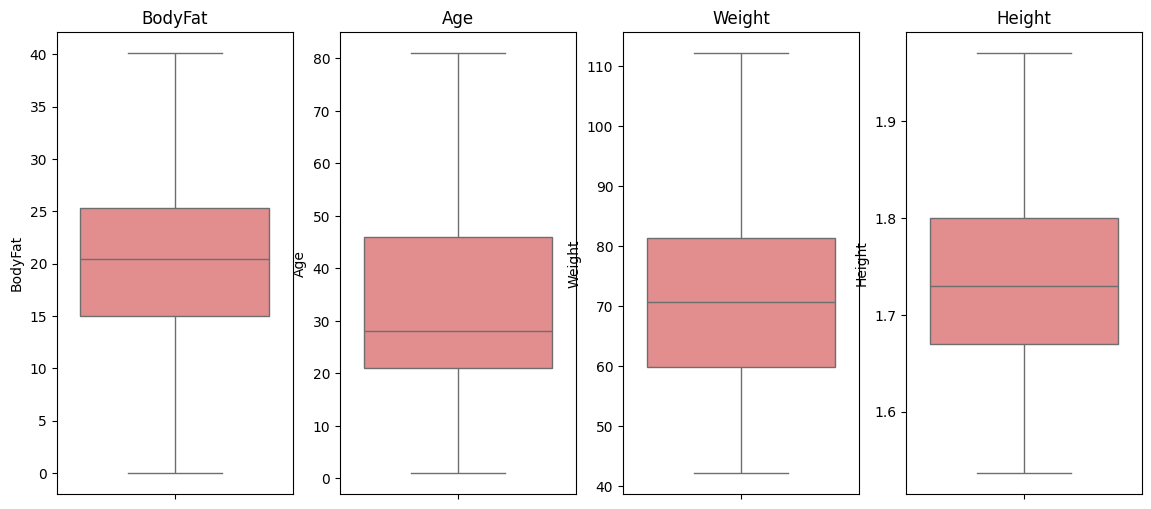

In [18]:
# filter dan menghapus data dari outlier dengan metode IQR (Interquartile Range)
for column in numeric_columns:
    Q1 = bmi_df[column].quantile(0.25)
    Q3 = bmi_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before = bmi_df.shape[0]
    bmi_df = bmi_df[(bmi_df[column] >= lower_bound) & (bmi_df[column] <= upper_bound)]
    after = bmi_df.shape[0]
    print(f"{column}: Dihapus {before - after} data outlier")

# visualisasi persebaran data setelah menghapus outlier
plt.figure(figsize=(14, 6))
for i, column in enumerate(numeric_columns): 
    plt.subplot(1, n, i+1)
    sns.boxplot(y=bmi_df[column], color='lightcoral')
    plt.title(column)

Langkah selanjutnya adalah memastikan bahwa data yang digunakan juga amsuk akal secara fisiologis. Nilai BodyFat mendekati 0% sangat tidak realistis bagi manusia. Acuan yang akan digunakan adalah Body Fat Minimum (American Council on Exercise)

- Pria: BodyFat < 4% (dihapus)
- Wanita: BodyFat < 10% (dihapus)

In [22]:
# jumlah sebelum pembersihan 
before = bmi_df.shape[0]

# filter berdasarkan gender 
bmi_df = bmi_df[~((bmi_df['Sex'] == 'M') & (bmi_df['BodyFat'] < 4))]
bmi_df = bmi_df[~((bmi_df['Sex'] == 'F') & (bmi_df['BodyFat'] < 10))]

# jumlah setelah pembersihan 
after = bmi_df.shape[0]
print(f"Jumlah data sebelum pembersihan: {before-after}")

Jumlah data sebelum pembersihan: 8


In [24]:
# hapus usia yang terlalu muda atau terlalu tua 
bmi_df = bmi_df[~((bmi_df['Age'] < 10) | (bmi_df['Age'] > 65))]

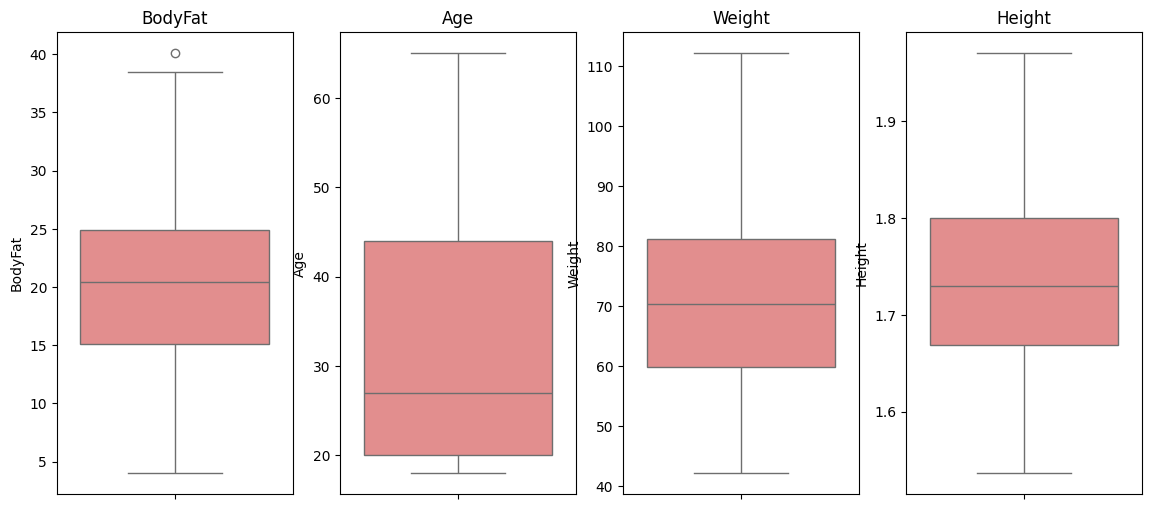

In [25]:
# visualisasi persebaran data setelah menghapus data yang tidak valid
plt.figure(figsize=(14, 6))
for i, column in enumerate(numeric_columns): 
    plt.subplot(1, n, i+1)
    sns.boxplot(y=bmi_df[column], color='lightcoral')
    plt.title(column)

# 2. menambahkan kolom BMI dan label sintetik sebagai **Ground Truth**

In [30]:
# hitung BMI untuk setiap entri 
bmi_df['BMI'] = bmi_df['Weight'] / (bmi_df['Height'] ** 2)

In [31]:
bmi_df.head()

,BodyFat,Sex,Age,Weight,Height,BMI
0,12.3,M,23,69.97,1.72,23.651298
1,6.1,M,22,78.59,1.84,23.213020
2,25.3,M,22,69.85,1.68,24.748441
3,10.4,M,26,83.80,1.84,24.751890
4,28.7,M,24,83.58,1.81,25.512042


In [ ]:
# menambahkan kolom kategori BMI 
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'
    
bmi_df['BMI_Category'] = bmi_df['BMI'].apply(categorize_bmi)

In [ ]:
# menambahkan kolom kategori Body Fat 
def categorize_body_fat(fat): 
    if fat < 15: 
        return 'low'
    elif fat < 25: 
        return 'normal'
    else: 
        return 'high'
    
bmi_df['Body_Fat_Category'] = bmi_df['BodyFat'].apply(categorize_body_fat)

In [43]:
def synthetic_calories(row):
    gender = row['Sex'].lower()
    age = row['Age']
    bmi = row['BMI']
    bodyfat = row['BodyFat']

    # Kebutuhan dasar pria dan wanita usia 19-30 tahun
    if gender == 'm':
        base_cal = 2500
    else:
        base_cal = 2000

    # Koreksi usia
    if age < 18:
        base_cal -= 300
    elif age > 50:
        base_cal -= 200

    # Koreksi berdasarkan BMI dan bodyfat
    if bmi < 18.5 or bodyfat < 10:
        base_cal += 300  # butuh surplus
    elif bmi >= 30 or bodyfat >= 30:
        base_cal -= 400  # disarankan defisit
    elif bmi >= 25 or bodyfat >= 25:
        base_cal -= 200

    return np.random.randint(base_cal - 100, base_cal + 100)

In [44]:
def synthetic_macros(calories, bmi):
    # Kalau BMI tinggi → protein lebih banyak untuk mempertahankan massa otot saat defisit
    if bmi >= 30:
        p = 0.25  # protein 25%
        c = 0.45  # karbo 45%
        f = 0.30  # lemak 30%
    elif bmi < 18.5:
        p = 0.20
        c = 0.55  # karbo lebih banyak
        f = 0.25
    else:
        p = 0.20
        c = 0.50
        f = 0.30

    carb = (c * calories) / 4
    protein = (p * calories) / 4
    fat = (f * calories) / 9
    return carb, protein, fat

In [45]:
bmi_df['Calories'] = bmi_df.apply(synthetic_calories, axis=1)

carb_list = []
protein_list = []
fat_list = []

for _, row in bmi_df.iterrows():
    carb, prot, fat = synthetic_macros(row['Calories'], row['BMI'])
    carb_list.append(round(carb, 1))
    protein_list.append(round(prot, 1))
    fat_list.append(round(fat, 1))

bmi_df['Carbohydrate'] = carb_list
bmi_df['Protein'] = protein_list
bmi_df['Fat'] = fat_list


In [46]:
bmi_df.head()

,BodyFat,Sex,Age,Weight,Height,BMI,Calories,Carbohydrate,Protein,Fat
0,12.3,M,23,69.97,1.72,23.651298,2599,324.9,130.0,86.6
1,6.1,M,22,78.59,1.84,23.213020,2829,353.6,141.5,94.3
2,25.3,M,22,69.85,1.68,24.748441,2342,292.8,117.1,78.1
3,10.4,M,26,83.80,1.84,24.751890,2402,300.2,120.1,80.1
4,28.7,M,24,83.58,1.81,25.512042,2266,283.2,113.3,75.5


In [47]:
# kategorisasi label makronutrisi
def categorize_calories(value):
    if value < 1800:
        return 'Rendah'
    elif value <= 2500:
        return 'Sedang'
    else:
        return 'Tinggi'

def categorize_protein(value):
    if value < 50:
        return 'Rendah'
    elif value <= 90:
        return 'Sedang'
    else:
        return 'Tinggi'

def categorize_carbs(value):
    if value < 200:
        return 'Rendah'
    elif value <= 300:
        return 'Sedang'
    else:
        return 'Tinggi'

def categorize_fat(value):
    if value < 50:
        return 'Rendah'
    elif value <= 80:
        return 'Sedang'
    else:
        return 'Tinggi'

In [48]:
bmi_df['Calories_Category'] = bmi_df['Calories'].apply(categorize_calories)
bmi_df['Protein_Category'] = bmi_df['Protein'].apply(categorize_protein)
bmi_df['Carbohydrate_Category'] = bmi_df['Carbohydrate'].apply(categorize_carbs)
bmi_df['Fat_Category'] = bmi_df['Fat'].apply(categorize_fat)


In [50]:
print(bmi_df['Calories_Category'].value_counts())
print(bmi_df['Protein_Category'].value_counts())
print(bmi_df['Carbohydrate_Category'].value_counts())
print(bmi_df['Fat_Category'].value_counts())


Calories_Category
Sedang    312
Tinggi     62
Rendah     31
Name: count, dtype: int64
Protein_Category
Tinggi    374
Sedang     31
Name: count, dtype: int64
Carbohydrate_Category
Sedang    287
Tinggi    105
Rendah     13
Name: count, dtype: int64
Fat_Category
Sedang    318
Tinggi     87
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_18000\3456050120.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bmi_df, x='Calories_Category', ax=axs[0, 0], palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_18000\3456050120.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bmi_df, x='Protein_Category', ax=axs[0, 1], palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_18000\3456050120.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bmi_df, x='Carbohydrate_Category', ax=axs[1, 0], palette='pastel')
C:\U

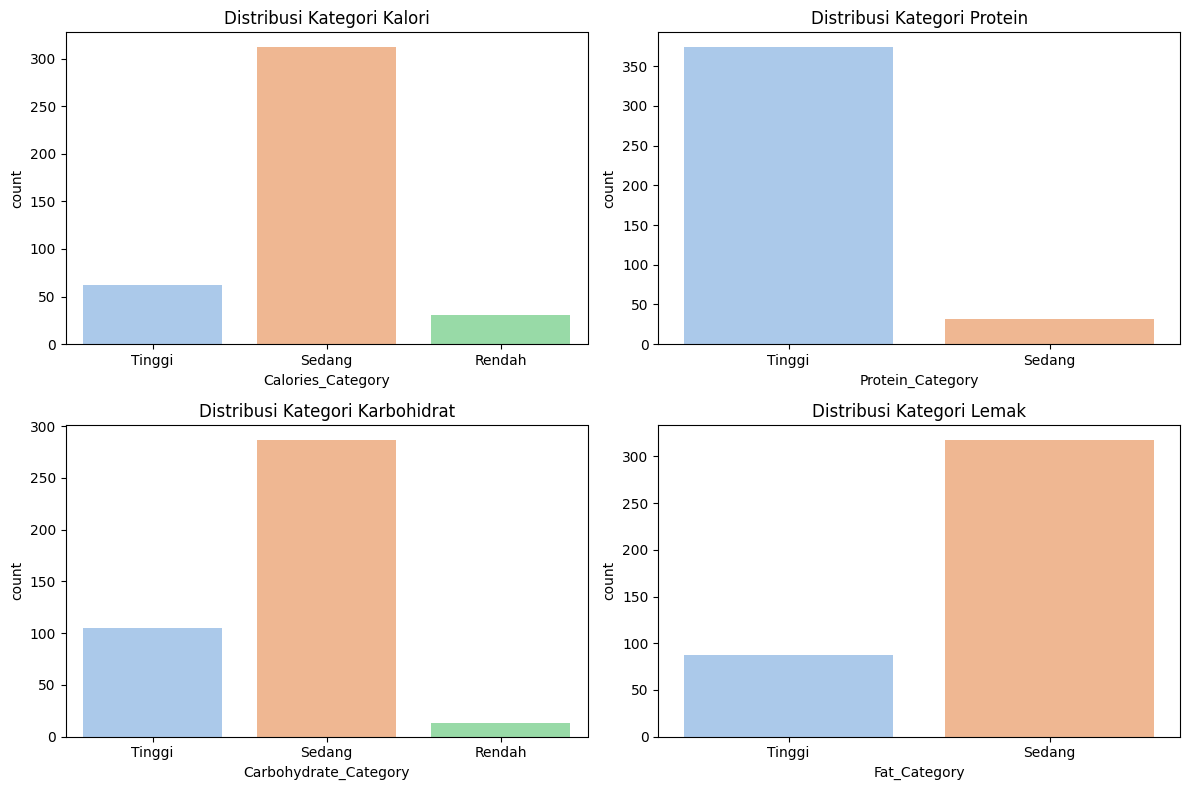

In [52]:
# visualisasi data 
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(data=bmi_df, x='Calories_Category', ax=axs[0, 0], palette='pastel')
axs[0, 0].set_title('Distribusi Kategori Kalori')
sns.countplot(data=bmi_df, x='Protein_Category', ax=axs[0, 1], palette='pastel')
axs[0, 1].set_title('Distribusi Kategori Protein')
sns.countplot(data=bmi_df, x='Carbohydrate_Category', ax=axs[1, 0], palette='pastel')
axs[1, 0].set_title('Distribusi Kategori Karbohidrat')
sns.countplot(data=bmi_df, x='Fat_Category', ax=axs[1, 1], palette='pastel')
axs[1, 1].set_title('Distribusi Kategori Lemak')

plt.tight_layout()
plt.show()

# 3. Perancangan sistem fuzzy

In [103]:
from skfuzzy import control as ctrl
import skfuzzy as fuzz

# 1. Definisikan variabel fuzzy input dan output
bmi = ctrl.Antecedent(np.arange(15, 40, 0.1), 'bmi')
bodyfat = ctrl.Antecedent(np.arange(5, 50, 0.1), 'bodyfat')

calories = ctrl.Consequent(np.arange(1000, 3500, 10), 'calories')
protein = ctrl.Consequent(np.arange(20, 150, 1), 'protein')
fat = ctrl.Consequent(np.arange(10, 100, 1), 'fat')

# 2. Membership function untuk BMI
bmi['underweight'] = fuzz.trimf(bmi.universe, [15, 15, 18.5])
bmi['normal'] = fuzz.trimf(bmi.universe, [18, 22, 25])
bmi['overweight'] = fuzz.trimf(bmi.universe, [23, 27, 30])
bmi['obese'] = fuzz.trimf(bmi.universe, [28, 40, 40])

# 3. Membership function untuk BodyFat
bodyfat['low'] = fuzz.trimf(bodyfat.universe, [5, 5, 15])
bodyfat['normal'] = fuzz.trimf(bodyfat.universe, [12, 20, 25])
bodyfat['high'] = fuzz.trimf(bodyfat.universe, [20, 50, 50])

# 4. Membership function untuk Calories
calories['rendah'] = fuzz.trimf(calories.universe, [1000, 1000, 1800])
calories['sedang'] = fuzz.trimf(calories.universe, [1500, 2200, 2800])
calories['tinggi'] = fuzz.trimf(calories.universe, [2600, 3500, 3500])

# 5. Membership function untuk Protein
protein['rendah'] = fuzz.trimf(protein.universe, [20, 20, 50])
protein['sedang'] = fuzz.trimf(protein.universe, [40, 70, 100])
protein['tinggi'] = fuzz.trimf(protein.universe, [90, 150, 150])

# 6. Membership function untuk Fat
fat['rendah'] = fuzz.trimf(fat.universe, [10, 10, 35])
fat['sedang'] = fuzz.trimf(fat.universe, [30, 50, 70])
fat['tinggi'] = fuzz.trimf(fat.universe, [60, 100, 100])

# 7. Definisikan aturan fuzzy (rule)
rule1 = ctrl.Rule(bmi['obese'] & bodyfat['high'], 
                  (calories['rendah'], protein['tinggi'], fat['rendah']))
rule2 = ctrl.Rule(bmi['normal'] & bodyfat['normal'], 
                  (calories['sedang'], protein['sedang'], fat['sedang']))
rule3 = ctrl.Rule(bmi['underweight'] & bodyfat['low'], 
                  (calories['tinggi'], protein['tinggi'], fat['tinggi']))

# 8. Buat sistem kontrol fuzzy
nutrition_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
nutrition_sim = ctrl.ControlSystemSimulation(nutrition_ctrl)

# 9. Contoh input dan inferensi output
nutrition_sim.input['bmi'] = 45
nutrition_sim.input['bodyfat'] = 40

nutrition_sim.compute()

print(f"Calories disarankan: {nutrition_sim.output['calories']:.2f}")
print(f"Protein disarankan: {nutrition_sim.output['protein']:.2f}")
print(f"Fat disarankan: {nutrition_sim.output['fat']:.2f}")

Calories disarankan: 1288.89
Protein disarankan: 127.79
Fat disarankan: 19.03


# 4. Evaluasi model

In [57]:
bmi_df.head()

,BodyFat,Sex,Age,Weight,Height,BMI,Calories,Carbohydrate,Protein,Fat,Calories_Category,Protein_Category,Carbohydrate_Category,Fat_Category
0,12.3,M,23,69.97,1.72,23.651298,2599,324.9,130.0,86.6,Tinggi,Tinggi,Tinggi,Tinggi
1,6.1,M,22,78.59,1.84,23.213020,2829,353.6,141.5,94.3,Tinggi,Tinggi,Tinggi,Tinggi
2,25.3,M,22,69.85,1.68,24.748441,2342,292.8,117.1,78.1,Sedang,Tinggi,Sedang,Sedang
3,10.4,M,26,83.80,1.84,24.751890,2402,300.2,120.1,80.1,Sedang,Tinggi,Tinggi,Tinggi
4,28.7,M,24,83.58,1.81,25.512042,2266,283.2,113.3,75.5,Sedang,Tinggi,Sedang,Sedang


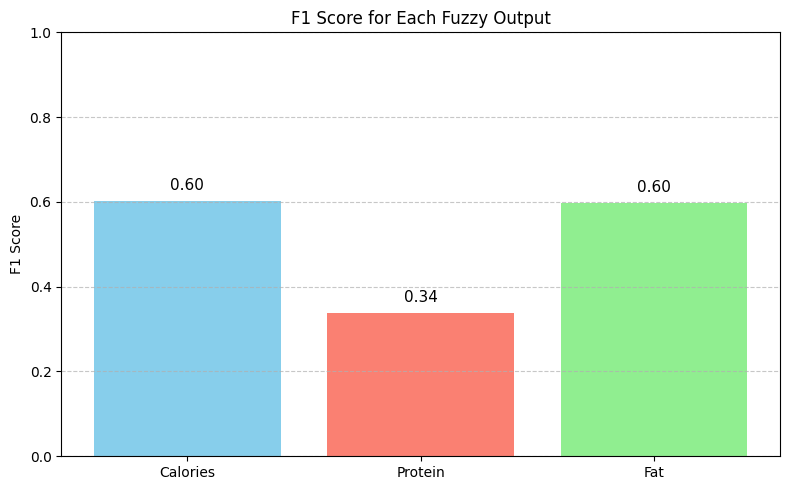

In [109]:
from sklearn.metrics import f1_score

pred_calories = []
pred_protein = []
pred_fat = []

for idx, row in bmi_df.iterrows():
    nutrition_sim.input['bmi'] = row['BMI']        # pastikan ini numerik
    nutrition_sim.input['bodyfat'] = row['BodyFat'] # juga numerik

    nutrition_sim.compute()

    calories_pred = categorize_calories(nutrition_sim.output['calories'])
    protein_pred = categorize_protein(nutrition_sim.output['protein'])
    fat_pred = categorize_fat(nutrition_sim.output['fat'])

    pred_calories.append(calories_pred)
    pred_protein.append(protein_pred)
    pred_fat.append(fat_pred)

# Hitung F1-score per output (micro average bisa juga macro, sesuaikan kebutuhan)
f1_calories = f1_score(bmi_df['Calories_Category'], pred_calories, average='weighted')
f1_protein = f1_score(bmi_df['Protein_Category'], pred_protein, average='weighted')
f1_fat = f1_score(bmi_df['Fat_Category'], pred_fat, average='weighted')

categories = ['Calories', 'Protein', 'Fat']
f1_scores = [f1_calories, f1_protein, f1_fat]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, f1_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Fuzzy Output')

# Tambahkan nilai di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02,
             f'{height:.2f}', ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()